In [34]:
import nltk
from nltk.tokenize import word_tokenize

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import gensim
import gensim.downloader as api

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [3]:
gigaword_glove_model = api.load("glove-wiki-gigaword-50")

gigaword_glove_model

In [4]:
len(list(gigaword_glove_model.key_to_index.keys()))

400000

In [5]:
for word in list(gigaword_glove_model.key_to_index.keys())[:10]:
        embedding = gigaword_glove_model.get_vector(word)
        
        print(f"Word: {word}, Embedding: {embedding}")

Word: the, Embedding: [ 4.1800e-01  2.4968e-01 -4.1242e-01  1.2170e-01  3.4527e-01 -4.4457e-02
 -4.9688e-01 -1.7862e-01 -6.6023e-04 -6.5660e-01  2.7843e-01 -1.4767e-01
 -5.5677e-01  1.4658e-01 -9.5095e-03  1.1658e-02  1.0204e-01 -1.2792e-01
 -8.4430e-01 -1.2181e-01 -1.6801e-02 -3.3279e-01 -1.5520e-01 -2.3131e-01
 -1.9181e-01 -1.8823e+00 -7.6746e-01  9.9051e-02 -4.2125e-01 -1.9526e-01
  4.0071e+00 -1.8594e-01 -5.2287e-01 -3.1681e-01  5.9213e-04  7.4449e-03
  1.7778e-01 -1.5897e-01  1.2041e-02 -5.4223e-02 -2.9871e-01 -1.5749e-01
 -3.4758e-01 -4.5637e-02 -4.4251e-01  1.8785e-01  2.7849e-03 -1.8411e-01
 -1.1514e-01 -7.8581e-01]
Word: ,, Embedding: [ 0.013441  0.23682  -0.16899   0.40951   0.63812   0.47709  -0.42852
 -0.55641  -0.364    -0.23938   0.13001  -0.063734 -0.39575  -0.48162
  0.23291   0.090201 -0.13324   0.078639 -0.41634  -0.15428   0.10068
  0.48891   0.31226  -0.1252   -0.037512 -1.5179    0.12612  -0.02442
 -0.042961 -0.28351   3.5416   -0.11956  -0.014533 -0.1499    0.2186

In [6]:
gigaword_glove_model["world"]

array([-0.41486 ,  0.71848 , -0.3045  ,  0.87445 ,  0.22441 , -0.56488 ,
       -0.37566 , -0.44801 ,  0.61347 , -0.11359 ,  0.74556 , -0.10598 ,
       -1.1882  ,  0.50974 ,  1.3511  ,  0.069851,  0.73314 ,  0.26773 ,
       -1.1787  , -0.148   ,  0.039853,  0.033107, -0.27406 ,  0.25125 ,
        0.41507 , -1.6188  , -0.81778 , -0.73892 , -0.28997 ,  0.57277 ,
        3.4719  ,  0.73817 , -0.044495, -0.15119 , -0.93503 , -0.13152 ,
       -0.28562 ,  0.76327 , -0.83332 , -0.6793  , -0.39099 , -0.64466 ,
        1.0044  , -0.2051  ,  0.46799 ,  0.99314 , -0.16221 , -0.46022 ,
       -0.37639 , -0.67542 ], dtype=float32)

In [7]:
gigaword_glove_model["world"].shape

(50,)

In [8]:
gigaword_glove_model["person"]

array([ 0.61734  ,  0.40035  ,  0.067786 , -0.34263  ,  2.0647   ,
        0.60844  ,  0.32558  ,  0.3869   ,  0.36906  ,  0.16553  ,
        0.0065053, -0.075674 ,  0.57099  ,  0.17314  ,  1.0142   ,
       -0.49581  , -0.38152  ,  0.49255  , -0.16737  , -0.33948  ,
       -0.44405  ,  0.77543  ,  0.20935  ,  0.6007   ,  0.86649  ,
       -1.8923   , -0.37901  , -0.28044  ,  0.64214  , -0.23549  ,
        2.9358   , -0.086004 , -0.14327  , -0.50161  ,  0.25291  ,
       -0.065446 ,  0.60768  ,  0.13984  ,  0.018135 , -0.34877  ,
        0.039985 ,  0.07943  ,  0.39318  ,  1.0562   , -0.23624  ,
       -0.4194   , -0.35332  , -0.15234  ,  0.62158  ,  0.79257  ],
      dtype=float32)

In [9]:
gigaword_glove_model.most_similar("space")

[('earth', 0.7598934769630432),
 ('shuttle', 0.739173173904419),
 ('orbit', 0.7259402871131897),
 ('solar', 0.7221783995628357),
 ('planet', 0.7160946726799011),
 ('orbiting', 0.7105640172958374),
 ('observation', 0.7063401341438293),
 ('spacecraft', 0.7053771615028381),
 ('nasa', 0.6978130340576172),
 ('build', 0.697019636631012)]

In [10]:
gigaword_glove_model.most_similar("boy")

[('girl', 0.932719886302948),
 ('woman', 0.8596121072769165),
 ('man', 0.8564430475234985),
 ('kid', 0.8192578554153442),
 ('mother', 0.8179757595062256),
 ('teenage', 0.802985668182373),
 ('baby', 0.8001461029052734),
 ('dad', 0.7850530743598938),
 ('her', 0.783680260181427),
 ('old', 0.7815377712249756)]

In [11]:
gigaword_glove_model.most_similar("girl")

[('boy', 0.9327197670936584),
 ('woman', 0.9065280556678772),
 ('mother', 0.8347674012184143),
 ('girls', 0.8182200789451599),
 ('girlfriend', 0.8109235167503357),
 ('teenage', 0.8099073171615601),
 ('her', 0.808667778968811),
 ('teen', 0.8006073236465454),
 ('baby', 0.7916797399520874),
 ('man', 0.7907536029815674)]

positive=["boy", "queen"] is specifying the input words for which you want to find similar words. In this case, you are providing two words, "boy" and "queen," as positive examples. The model will look for words that are similar to the combination of these two words.

In [12]:
gigaword_glove_model.most_similar(positive=["boy", "queen"])

[('girl', 0.8645868897438049),
 ('mother', 0.8632634282112122),
 ('her', 0.8385725617408752),
 ('woman', 0.8301162719726562),
 ('daughter', 0.8274633884429932),
 ('lady', 0.8184837102890015),
 ('sister', 0.8000248074531555),
 ('she', 0.7980163097381592),
 ('lover', 0.7960450053215027),
 ('father', 0.7937911152839661)]

In [13]:
gigaword_glove_model.most_similar(positive=["boy", "queen"], negative=["girl"])

[('king', 0.8660337924957275),
 ('lady', 0.784384548664093),
 ('prince', 0.7674881815910339),
 ('elizabeth', 0.7314176559448242),
 ('throne', 0.7252335548400879),
 ('royal', 0.7249882221221924),
 ('son', 0.723145067691803),
 ('consort', 0.7201471924781799),
 ('crown', 0.7176241278648376),
 ('monarch', 0.7168442010879517)]

In [14]:
gigaword_glove_model.most_similar(positive=["boy", "queen"], negative=["girl"], topn=1)

[('king', 0.8660337924957275)]

In [15]:
gigaword_glove_model.similarity("man", "king")

0.53093773

In [16]:
gigaword_glove_model.similarity("man", "prince")

0.5073696

In [17]:
gigaword_glove_model.similarity("apple", "pizza")

0.46747193

In [18]:
gigaword_glove_model.similarity("bird", "carrot")

0.17771345

In [19]:
gigaword_glove_model.doesnt_match(["man", "women", "lily", "waiter", "boy"])

'lily'

In [20]:
gigaword_glove_model.doesnt_match(["pizza", "water", "juice", "earth", "pie"])

'earth'

In [21]:
words = [
        'sunny', 'cloudy', 'rainy', 'stormy', 'snowy', 'windy',
        'car', 'truck', 'motorcycle', 'bicycle', 'airplane', 'ship',
        'computer', 'smartphone', 'tablet', 'laptop', 'router', 'printer',
        'rock', 'jazz', 'hip-hop', 'classical', 'reggae', 'electronic',
        'happy', 'sad', 'angry', 'surprised', 'excited', 'calm',
        'pizza', 'pasta', 'sushi', 'burger', 'salad'
    ]

print(words)

['sunny', 'cloudy', 'rainy', 'stormy', 'snowy', 'windy', 'car', 'truck', 'motorcycle', 'bicycle', 'airplane', 'ship', 'computer', 'smartphone', 'tablet', 'laptop', 'router', 'printer', 'rock', 'jazz', 'hip-hop', 'classical', 'reggae', 'electronic', 'happy', 'sad', 'angry', 'surprised', 'excited', 'calm', 'pizza', 'pasta', 'sushi', 'burger', 'salad']


In [22]:
embeddings = [gigaword_glove_model[word] for word in words]

embeddings

[array([ 0.28303  ,  0.82852  , -0.79144  ,  0.096621 , -0.21481  ,
        -1.3104   , -0.8404   ,  0.39867  , -0.32569  , -0.0043573,
        -0.28412  , -0.65879  ,  0.93098  , -0.076139 ,  0.0055169,
         1.0263   , -0.059263 , -0.086535 , -0.42904  , -0.65045  ,
        -0.60974  ,  1.3374   ,  0.54669  ,  0.089622 ,  0.83857  ,
         0.73393  , -0.059149 ,  1.6792   ,  0.65027  ,  0.86267  ,
         1.6334   ,  0.047072 ,  0.3743   , -0.0067205,  0.55574  ,
        -0.34922  , -0.2194   ,  0.40909  , -0.21448  , -0.62203  ,
        -0.48862  ,  0.52183  , -0.29933  , -0.70177  , -0.026734 ,
         0.20646  ,  0.14541  , -1.2577   ,  0.14762  ,  0.67417  ],
       dtype=float32),
 array([ 0.18087 ,  0.86173 ,  0.093161, -0.27918 , -1.1281  , -0.78483 ,
        -0.63981 , -0.01217 , -0.12839 ,  0.67395 , -0.33599 , -0.77355 ,
         0.53708 ,  0.23574 , -0.96302 ,  0.6747  , -0.75651 , -0.18798 ,
        -0.98727 , -0.21807 , -1.3806  ,  1.907   ,  1.5361  , -0.61853 ,


In [23]:
embeddings_array = np.array(embeddings)

embeddings_array

array([[ 0.28303 ,  0.82852 , -0.79144 , ..., -1.2577  ,  0.14762 ,
         0.67417 ],
       [ 0.18087 ,  0.86173 ,  0.093161, ..., -0.18592 ,  0.50542 ,
         0.53404 ],
       [ 0.30803 ,  0.54658 , -0.9499  , ..., -0.42373 ,  0.36562 ,
         0.43045 ],
       ...,
       [-0.22004 ,  0.017557, -1.0646  , ..., -0.38243 ,  0.77849 ,
         0.64369 ],
       [ 0.36973 , -1.1797  , -0.92375 , ..., -0.54113 ,  0.21458 ,
         0.8122  ],
       [ 0.42899 , -0.075563, -1.5732  , ...,  0.10291 ,  1.0067  ,
         0.2322  ]], dtype=float32)

In [24]:
tsne = TSNE(n_components=2, perplexity=5, \
            learning_rate=100, random_state=42)

tsne

TSNE(learning_rate=100, perplexity=5, random_state=42)

In [25]:
embeddings_2d = tsne.fit_transform(embeddings_array)

embeddings_2d

array([[ -81.728874 ,   91.56576  ],
       [ -64.02564  ,   84.22756  ],
       [ -85.3781   ,  106.1403   ],
       [ -94.20571  ,  118.04906  ],
       [ -74.18199  ,  114.24327  ],
       [ -72.6566   ,   98.744545 ],
       [  76.12098  ,    0.6790524],
       [  66.451    ,   -4.358902 ],
       [  80.19728  ,  -17.543625 ],
       [  89.297935 ,  -11.132917 ],
       [  62.46882  ,   11.154215 ],
       [  52.757477 ,   18.499197 ],
       [ 153.27763  ,   15.556394 ],
       [ 186.18639  ,   29.828766 ],
       [ 177.33775  ,   37.65548  ],
       [ 165.456    ,   23.737244 ],
       [ 179.77081  ,   12.293607 ],
       [ 156.79855  ,   33.555668 ],
       [-103.06129  ,  -76.69812  ],
       [ -96.68092  ,  -63.466595 ],
       [-116.47933  ,  -71.54399  ],
       [ -84.11287  ,  -61.582657 ],
       [-109.7168   ,  -61.618282 ],
       [ 142.33151  ,   14.398319 ],
       [-117.94634  ,   39.8452   ],
       [-130.31958  ,   33.676674 ],
       [-124.20114  ,   62.50593  ],
 

In [26]:
embeddings_2d.shape

(35, 2)

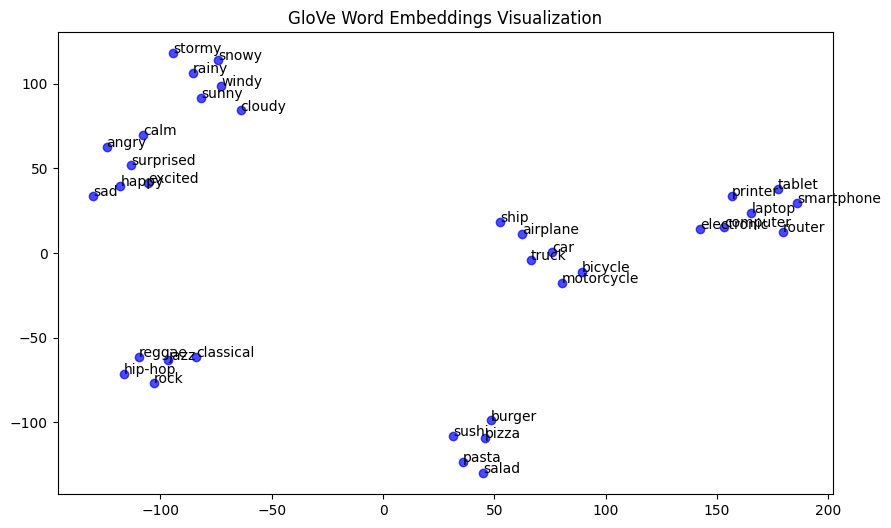

In [28]:
plt.figure(figsize=(10, 6))

plt.title("GloVe Word Embeddings Visualization")

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', alpha=0.7)

for i, word in enumerate(words):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.show()

In [32]:
df = pd.read_csv("./datasets/cleaned_reviews.csv")

df.head(10)

,text,label
0,product is good but price is to high after pur...,2
1,not gudpoor cloth,0
2,did not show correct reading even once,0
3,4 star for short power chord thanks flipkart f...,2
4,issue is mop road rotatingits off worst qualit...,0
5,product it is not very good not perfectly join...,1
6,very cheap quality damaged pieces waste of money,0
7,this product its good but so lightweight not o...,0
8,product so very good quality but delivered to ...,1
9,it gave negative result in covid test but when...,0


In [35]:
x_train, x_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((13896,), (13896,), (3474,), (3474,))

In [36]:
def document_vectorizer(doc, model):
    words = doc.split()

    vectors = [model.get_vector(word) for word in words if word in model]

    if vectors:
        mean_vector = np.mean(vectors, axis=0)
    else:
        mean_vector = np.zeros(model.vector_size)

    return mean_vector

In [37]:
clf = GaussianNB()

clf

GaussianNB()

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

text_clf = Pipeline([
    ('vectorizer', FunctionTransformer(
        lambda x: [document_vectorizer(doc, gigaword_glove_model) for doc in x])),
    ('classifier', clf)
])

text_clf

Pipeline(steps=[('vectorizer',
                 FunctionTransformer(func=<function <lambda> at 0x7f94f78b4dc0>)),
                ('classifier', GaussianNB())])

In [39]:
text_clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 FunctionTransformer(func=<function <lambda> at 0x7f94f78b4dc0>)),
                ('classifier', GaussianNB())])

In [40]:
y_pred = text_clf.predict(x_test)

y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [42]:
def summarize_classification(y_test, y_pred):

    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    acc = accuracy_score(y_test, y_pred, normalize=True)
    
    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print("Length of testing data: ", len(y_test))
    
    print("accuracy_count : ", num_acc)
    print("accuracy_score : ", acc)
    
    print("precision_score : ", prec)
    print("recall_score : ", recall)

In [43]:
summarize_classification(y_test, y_pred)

Length of testing data:  3474
accuracy_count :  1890
accuracy_score :  0.5440414507772021
precision_score :  0.5577049030459728
recall_score :  0.5440414507772021


In [44]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.49      0.72      0.58      1168
           1       0.52      0.36      0.42      1184
           2       0.67      0.55      0.61      1122

    accuracy                           0.54      3474
   macro avg       0.56      0.55      0.54      3474
weighted avg       0.56      0.54      0.54      3474



https://www.himandthyme.com/understanding-and-visualizing-word-embeddings-with-glove-and-word2vec/

In [45]:
def visualize_embeddings(embeddings, words, num_words_to_visualize=200):
    tsne = TSNE(n_components=2, random_state=0, perplexity=30)
    
    selected_words = np.random.choice(
        words, size=min(num_words_to_visualize, len(words)), replace=False)
    
    embedding_vectors = np.array([embeddings[word] for word in selected_words])
    
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(12, 6))
    
    for i, word in enumerate(selected_words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(
            word, (x, y), xytext=(5, 2), 
            textcoords="offset points", ha="right", va="bottom"
        )
    plt.show()

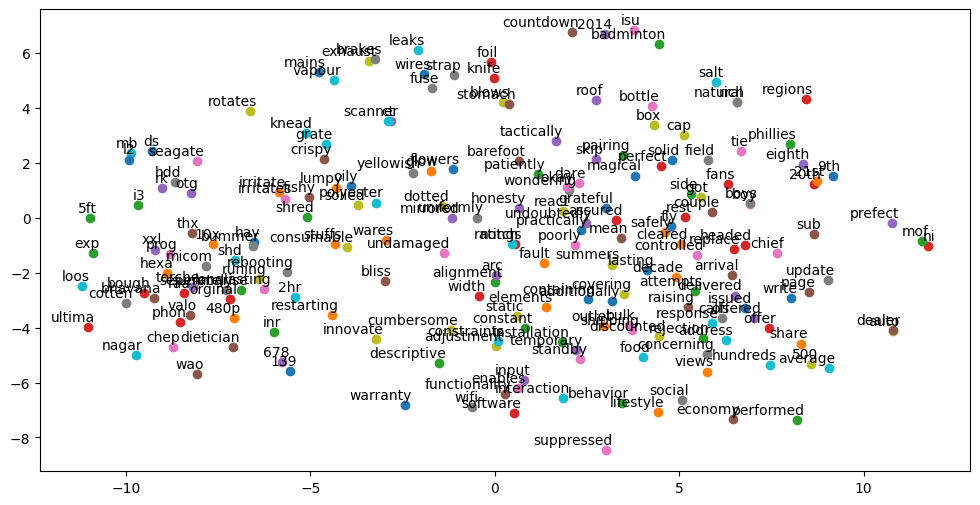

In [55]:
preprocessed_tokens = ' '.join(df['text']).split()

glove_words = list(set([word for word in preprocessed_tokens if word in gigaword_glove_model]))

visualize_embeddings(gigaword_glove_model, glove_words, num_words_to_visualize=200)

In [56]:
import plotly.express as px

def visualize_embeddings_3d(embeddings, words, num_words_to_visualize=200):
    tsne = TSNE(n_components=3, random_state=0, perplexity=30)
    
    selected_words = np.random.choice(
        words, size=min(num_words_to_visualize, len(words)), replace=False)
    
    embedding_vectors = np.array([embeddings[word] for word in selected_words])
    
    three_d_embeddings = tsne.fit_transform(embedding_vectors)

    df = pd.DataFrame(three_d_embeddings, columns=['X', 'Y', 'Z'])
    
    df['Word'] = selected_words

    fig = px.scatter_3d(df, x='X', y='Y', z='Z', text='Word', title='3D t-SNE Embeddings')
    
    fig.show()

### TODO Recording:

- Please zoom into the plot so you can see more detail
- Then pan till you see at least some similar words close to each other in space

In [57]:
preprocessed_tokens = ' '.join(df['text']).split()

glove_words = list(set([word for word in preprocessed_tokens if word in gigaword_glove_model]))

visualize_embeddings_3d(gigaword_glove_model, glove_words, num_words_to_visualize=200)

In [58]:
def word_similarity(target_word, embeddings_model, top_n=10):
    
    if target_word not in embeddings_model:
        return f"{target_word} is not in the vocabulary."

    similarity_scores = {
        word: embeddings_model.similarity(target_word, word)
        for word in embeddings_model.index_to_key
    }

    sorted_words = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)

    similar_words = sorted_words[:top_n]
    for word, score in similar_words:
        print(f"{word}: {score:.4f}")

In [59]:
target_word = "sun"

word_similarity(target_word, gigaword_glove_model, top_n=10)

sun: 1.0000
sky: 0.6637
moon: 0.6543
bright: 0.6353
cloud: 0.6327
blue: 0.6263
hung: 0.6211
light: 0.6165
earth: 0.6038
hang: 0.6001


In [60]:
target_word = "summer"

word_similarity(target_word, gigaword_glove_model, top_n=10)

summer: 1.0000
winter: 0.9200
spring: 0.8946
autumn: 0.8394
beginning: 0.8159
starting: 0.7925
day: 0.7915
weekend: 0.7912
during: 0.7859
days: 0.7765


In [61]:
target_word = "happy"

word_similarity(target_word, gigaword_glove_model, top_n=10)

happy: 1.0000
'm: 0.9142
everyone: 0.8976
everybody: 0.8965
really: 0.8840
me: 0.8785
definitely: 0.8763
maybe: 0.8757
'd: 0.8718
feel: 0.8708


In [62]:
target_word = "weekend"

word_similarity(target_word, gigaword_glove_model, top_n=10)

weekend: 1.0000
sunday: 0.9103
saturday: 0.8987
week: 0.8974
day: 0.8777
night: 0.8730
friday: 0.8464
last: 0.8407
next: 0.8393
weeks: 0.8370
